In [1]:
import numpy as np
import panel as pn
pn.extension('plotly')

from sabr_bvol import *

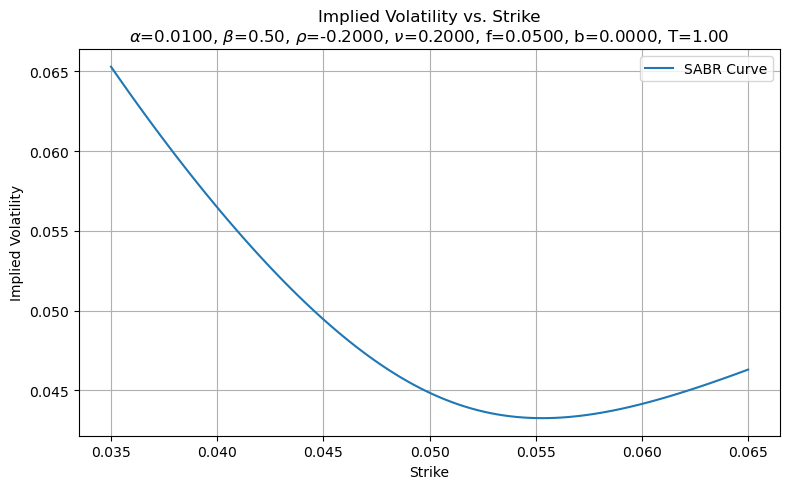

In [2]:
# Example smile
f = 0.05
b = 0
a = 0.01
B = 0.5
p = -0.2
v = 0.2
T = 1
strikes = f + np.array([-150,-100,-50,-25,0,25,50,100,150]) * 0.0001
plot_smile(f, b, a, B, p, v, T, strikes)

In [3]:
# Actual data
f = 0.033460207
b = 0
B = 0.5
T = 5
s0 = 0.2304
sigmas = np.array([0.3108, 0.2749, 0.2488, 0.2387, 0.2304, 0.2237, 0.2184, 0.2115, 0.2083])
Ks_bp = np.array([-150,-100,-50,-25,0,25,50,100,150])

strikes = f + Ks_bp * 0.0001
local_strikes = strikes[3:6]
local_sigmas = sigmas[3:6]

/Users/ydu25/Documents/GitHub/Rates-Projects/sabr-model/sabr_bvol.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  coefs, _ = curve_fit(eval_cubic_func, Xs, local_sigmas, p0=(1, 1, 1), maxfev=10000)


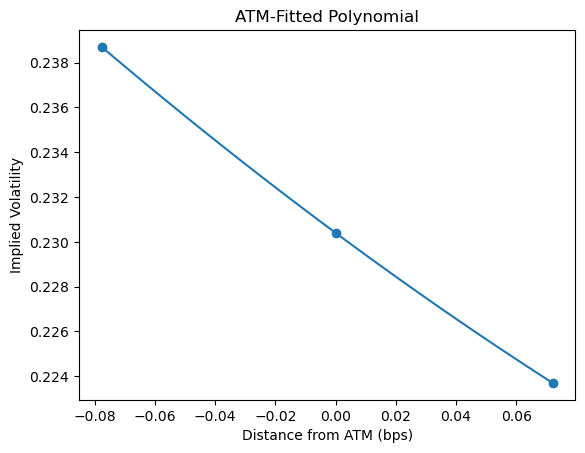

In [4]:
# Guess
p_0, v_0 = generate_guess(local_strikes, local_sigmas, s0, f, b, B, T, True)

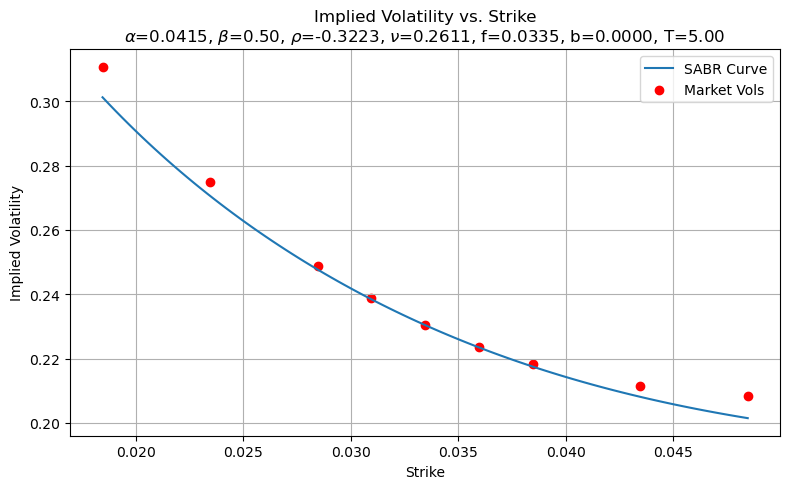

In [5]:
# Plot guessed curve
a_0 = alpha_from_sigma(s0, f, b, B, p_0, v_0, T)
plot_smile(f, b, a_0, B, p_0, v_0, T, strikes, sigmas)

In [6]:
# Calibrate
[p_fin, v_fin], _ = estimate_alpha_rho_nu(strikes, sigmas, s0, f, b, B, T, [p_0, v_0])
a_fin = alpha_from_sigma(s0, f, b, B, p_fin, v_fin, T)

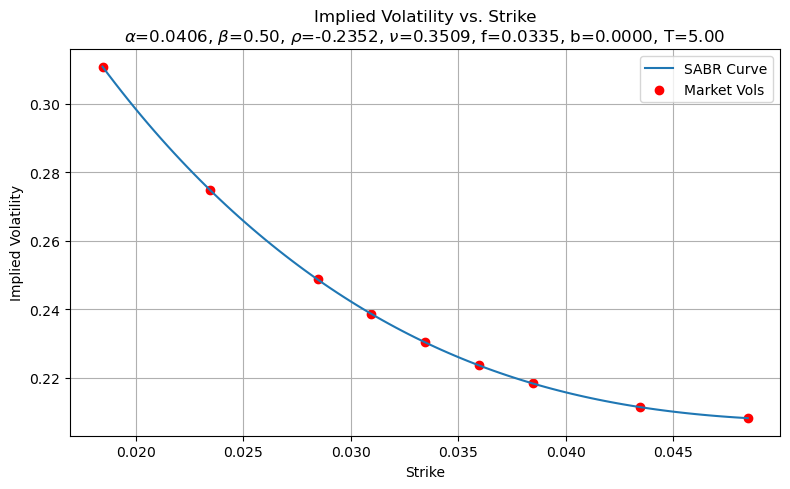

In [7]:
# Plot calibrated smile
plot_smile(f, b, a_fin, B, p_fin, v_fin, T, strikes, sigmas)

In [8]:
# Interactive plot
x_vals = np.linspace(strikes.min(), strikes.max())

# Sliders
a_slider = pn.widgets.FloatSlider(name='a', start=0.01, end=3.0, step=0.05, value=a_fin)
B_slider = pn.widgets.FloatSlider(name='B', start=0, end=1, step=0.01, value=B)
p_slider = pn.widgets.FloatSlider(name='p', start=-0.99, end=0.99, step=0.01, value=p_fin)
v_slider = pn.widgets.FloatSlider(name='v', start=0.01, end=3.0, step=0.05, value=v_fin)

# Reset button
def reset_sliders(event):
    a_slider.value = a_fin
    B_slider.value = B
    p_slider.value = p_fin
    v_slider.value = v_fin

reset_button = pn.widgets.Button(name='Reset', button_type='primary')
reset_button.on_click(reset_sliders)

@pn.depends(a=a_slider, B=B_slider, p=p_slider, v=v_slider)
def plot_func(a, B, p, v):
    y_vals = [sigma(f, x, b, a, B, p, v, T) for x in x_vals]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines'))
    fig.update_layout(
        title='Implied Volatility vs Strike',
        xaxis_title='Strike',
        yaxis_title='Implied Volatility',
        height=500
    )
    return fig

controls = pn.Column("### Parameters", a_slider, B_slider, p_slider, v_slider, reset_button, width=250)
layout = pn.Row(plot_func, controls)

layout

Row
    [0] ParamFunction(function, _pane=Plotly, defer_load=False)
    [1] Column(width=250)
        [0] Markdown(str)
        [1] FloatSlider(end=3.0, name='a', start=0.01, step=0.05, value=0.040595580274953275)
        [2] FloatSlider(name='B', step=0.01, value=0.5)
        [3] FloatSlider(end=0.99, name='p', start=-0.99, step=0.01, value=-0.23521603480273176)
        [4] FloatSlider(end=3.0, name='v', start=0.01, step=0.05, value=0.35092273290961873)
        [5] Button(button_type='primary', name='Reset')